# Deep-Learning with Keras

#### Ugur URESIN, AI Engineer | Data Scientist
#### Mail: uresin.ugur@gmail.com

## Chapter 03. Neural Networks - Binary Classification with Network Iterations

### Dataset: IMDB

### The Steps
* **Step01**. Loading Dataset
* **Step02**. Assesing the Dataset
* **Step03**. Preparing the Dataset
* **Step04**. Building the network architecture
* **Step05**. The compilation
* **Step06**. Creating a Validation Set
* **Step07**. Training
* **Step08**. Evaluating the performance

#### Step 01. Loading Dataset

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

**num_words** is to keep the 10000 most frequent samples to overlook rare samples so that the vector would be manageble

The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words).  
**train_labels** and **test_labels** are lists of 0s and 1s, where
* 0 stands for negative  
* 1 stands for positive:

In [3]:
#Since it's restricted that the top 10,000 most frequent words, no word index will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

#### Step 02. Assesing the Dataset

In [4]:
print("Training data dimensions:", train_data.shape)
print("Number of training labels:", len(train_labels))
print("Test data dimensions:", test_data.shape)
print("Number of test labels:", len(test_labels))

Training data dimensions: (25000,)
Number of training labels: 25000
Test data dimensions: (25000,)
Number of test labels: 25000


In [5]:
train_labels[1:10] #0:Negative Critic, 1:Positive critic

array([0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [6]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
# word_index is a dictionary that maps words to an integer index
word_index = imdb.get_word_index()

# converts integer indices to a word
reverse_word_index = dict([(val,key) for (key,val) in word_index.items()])

**Decoding the review**  
Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [8]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### Step03. Preparing the Dataset

Lists of integers can not fed into a neural network.  
**Lists must be converted into tensors!**  

There are two ways to do that:

1. **Padding the lists** so that they all have the same length, and **turning them into an integer tensor of shape** (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (**the Embedding layer**).  


2. **One-hot encoding**  to turn the lists into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [9]:
#Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
print("The first element of the original list:\n", train_data[0])
print("\nThe first element of the vectorized data:\n", x_train[0])
print("\nThe length of the vectorized data:\n", x_train[0].shape[0])

The first element of the original list:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

The first element 

In [11]:
# Vectorization of the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Step04. Building the network architecture

**Here the architecture can be defined as**  
output = relu(dot(W, input) + b)  

There are two key architecture decisions to be made about such a stack of Dense layers:  
* How many layers to use  
* How many hidden units to choose for each layer

Now we will build the network architecture as follows  
* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of
the current review

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

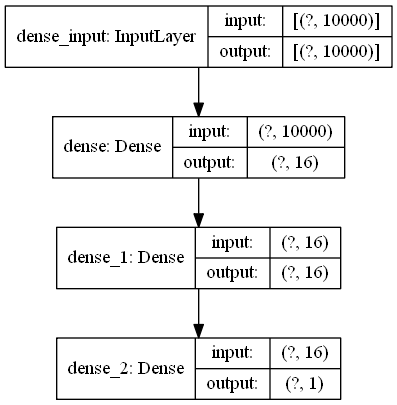

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_ch03.png', show_shapes=True, show_layer_names=True)

#### Step05. The compilation

In [14]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ['accuracy'])

##### Configuring the Optimizer

In [15]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

##### Using custom losses and metrics

In [16]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### Step06. Creating a Validation Set

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Step07. Training

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5379 - acc: 0.7790 - val_loss: 0.4083 - val_acc: 0.8643
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3245 - acc: 0.9009 - val_loss: 0.3130 - val_acc: 0.8891
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2318 - acc: 0.9255 - val_loss: 0.2814 - val_acc: 0.8915
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1822 - acc: 0.9424 - val_loss: 0.2730 - val_acc: 0.8922
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1444 - acc: 0.9559 - val_loss: 0.3072 - val_acc: 0.8798
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1223 - acc: 0.9621 - val_loss: 0.2905 - val_acc: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0992 - acc: 0.9721 - val_loss: 0.3397 - val_acc: 0.8782
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0837 - a

**Note that** the call to model.fit() returns a History object.  
This object has a member history, which is a dictionary containing data about everything that happened during training.

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### Step08. Evaluating the performance

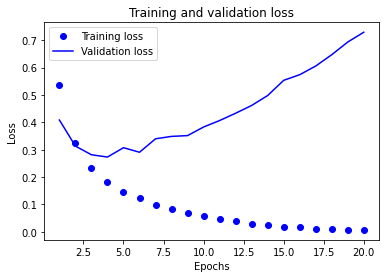

In [20]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo:blue-dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b:solid-blue
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

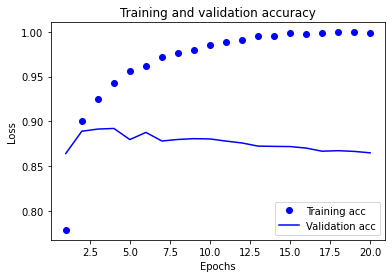

In [21]:
#Plotting the training and validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Overfitting**  
It can be seen that the training loss decreases with every epoch, and the training accuracy increases with every epoch.  
That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with every iteration.  
But that isn’t the case for the validation loss and accuracy: they seem to peak **at the fourth epoch**.  

This is an example of overfitting!

After the second epoch, over-optimization on the training data occur, and don’t generalize to data outside of the training set.

To prevent overfitting, training could be stopped after three epochs.  
In general, a range of techniques to mitigate overfitting can be used (will be covered in chapter 4).  

Let’s train a new network from scratch for four epochs and then evaluate it on the test data.

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
#
hist_t1 = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))
#
history_dict1 = hist_t1.history
#
results1 = model.evaluate(x_test, y_test)
results1

Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.4447 - binary_accuracy: 0.8262 - val_loss: 0.3086 - val_binary_accuracy: 0.8884
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2567 - binary_accuracy: 0.9109 - val_loss: 0.1982 - val_binary_accuracy: 0.9368
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1981 - binary_accuracy: 0.9295 - val_loss: 0.1566 - val_binary_accuracy: 0.9522
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3024 - binary_accuracy: 0.8794


[0.3023662567138672, 0.879360020160675]

In [23]:
print("Now the testing accuracy is reached:", round(100*results1[1],1), "%")

Now the testing accuracy is reached: 87.9 %


#### Prediction

In [24]:
model.predict(x_test)

array([[0.14926895],
       [0.9996512 ],
       [0.8825562 ],
       ...,
       [0.08771276],
       [0.04989627],
       [0.5039408 ]], dtype=float32)

### Further Trials

#### The Common Part for the Further Trials

In [30]:
## DATA LOADING
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


## DATA PREPERATION
#Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorization of the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


## VALIDATION SET CREATION
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## KERAS PREREQUISITES
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

#### Trial2 (3 Hidden Layers (64-32-16) - Activation:relu - Loss:binary_crossentropy)

In [31]:
## BUILDING THE ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## MODEL COMPILATION
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## TRAINING (MODEL-FITTING)
hist_t2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

## GETTING THE TRAINING HISTORY
history_dict2 = hist_t2.history

## GETTING THE TESTING RESULTS
results2 = model.evaluate(x_test, y_test)
results2

782/782 [==============================] - 1s 2ms/step - loss: 1.0633 - binary_accuracy: 0.8554


[1.0632632970809937, 0.8553599715232849]

#### Trial3 (2 Hidden Layers (16-16) - Activation:tanh - Loss:binary_crossentropy)

In [32]:
## BUILDING THE ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

## MODEL COMPILATION
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## TRAINING (MODEL-FITTING)
hist_t3 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

## GETTING THE TRAINING HISTORY
history_dict3 = hist_t3.history

## GETTING THE TESTING RESULTS
results3 = model.evaluate(x_test, y_test)
results3

782/782 [==============================] - 1s 1ms/step - loss: 0.8552 - binary_accuracy: 0.8470


[0.8551685214042664, 0.847000002861023]

#### Trial4 (2 Hidden Layers (16-16) - Activation:relu - Loss:mse)

In [33]:
## BUILDING THE ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## MODEL COMPILATION
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.mse])

## TRAINING (MODEL-FITTING)
hist_t4 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

## GETTING THE TRAINING HISTORY
history_dict4 = hist_t4.history

## GETTING THE TESTING RESULTS
results4 = model.evaluate(x_test, y_test)
results4

782/782 [==============================] - 1s 1ms/step - loss: 0.1250 - mean_squared_error: 0.1250


[0.12500256299972534, 0.12500256299972534]

### CONCLUSION

In [ ]:
print(history_dict.keys())
print(history_dict2.keys())
print(history_dict3.keys())
print(history_dict4.keys())

In [34]:
loss1, val_loss1 = history_dict['loss'], history_dict['val_loss']
loss2, val_loss2 = history_dict2['loss'], history_dict2['val_loss']
loss3, val_loss3 = history_dict3['loss'], history_dict3['val_loss']
loss4, val_loss4 = history_dict4['loss'], history_dict4['val_loss']

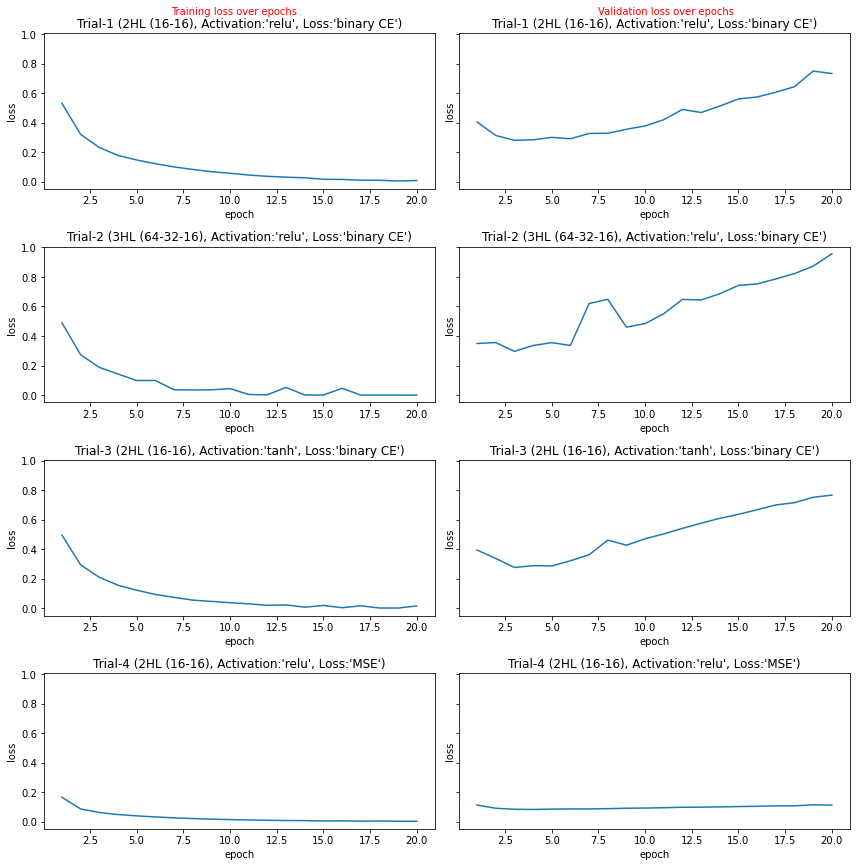

In [36]:
## PLOTTING THE RESULTS (training and validation accuracy)
epochs = range(1,20+1)

title1 = "Trial-1 (2HL (16-16), Activation:'relu', Loss:'binary CE')"
title2 = "Trial-2 (3HL (64-32-16), Activation:'relu', Loss:'binary CE')"
title3 = "Trial-3 (2HL (16-16), Activation:'tanh', Loss:'binary CE')"
title4 = "Trial-4 (2HL (16-16), Activation:'relu', Loss:'MSE')"

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

fig, axs = plt.subplots(4,2, sharex=False, sharey=True)
#
axs[0,0].plot(epochs, loss1)
axs[0,0].set_title(title1)
axs[0,1].plot(epochs, val_loss1)
axs[0,1].set_title(title1)
#
axs[1,0].plot(epochs, loss2)
axs[1,0].set_title(title2)
axs[1,1].plot(epochs, val_loss2)
axs[1,1].set_title(title2)
#
axs[2,0].plot(epochs, loss3)
axs[2,0].set_title(title3)
axs[2,1].plot(epochs, val_loss3)
axs[2,1].set_title(title3)
#
axs[3,0].plot(epochs, loss4)
axs[3,0].set_title(title4)
axs[3,1].plot(epochs, val_loss4)
axs[3,1].set_title(title4)

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

plt.figtext(.275,1, "Training loss over epochs\n", ha="center", va="top", fontsize=10, color="r")
plt.figtext(.775,1, "Validation loss over epochs\n", ha="center", va="top", fontsize=10, color="r")
fig.tight_layout()
plt.show()